In this report, the **"Spaceship Titanic"** dataset is analysed, which contains information about passengers who travelled on a space cruise ship. The data includes features such as the passenger's ID, home planet, age, and the amenities they used during the journey, such as room service, spa, VR deck, and food court. The dataset also includes information about whether the passenger was transported or not.The dataset is downloaded from Kaggle competition(source:https://www.kaggle.com/competitions/spaceship-titanic/overview)


Importing necessary libraries

In [399]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler

In [487]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn import tree
from sklearn.metrics import r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

##  Describe and justify two different topics or approaches you might want to consider for this dataset and task

- **Feature Engineering:**On the preliminary assessment of data, one approach that could be considered to improve the predictive accuracy is to perform feature engineering. This step involves performing missing value assessment and extracting information from existing features to create new features. For instance, we could consider extracting the group information from the passenger ID to create a new feature indicating the total number of family or friends on board. Based on the group information, missing values can be estimated.
Moreover, the distribution across spend categories for instance food court vs VR Deck could be different or similar, and new features could be combined from them. Since there are more categorical variables than continuous ones, it is important to decide between one-hot encoding versus label fitting.



- **Model Generalization:** The widely solved problem  with this dataset is of binary classification, specifically whether a passenger was transported successfully or not. While a classification tree is a reasonable choice for modeling, it may suffer from overfitting and lack of generalization. Therefore, it is recommended to explore ensemble models such as random forests or boosted trees, which have been shown to perform well in similar binary classification problems. These models can help to reduce overfitting and improve the accuracy of predictions.

## Data cleaning and preliminary analysis

To ensure the availability of labels, the training file of the Spaceship Titanic was utilized for the remainder of the analysis.

In [401]:
#Reading the training dataset.The dataframe is referred to with pre-fix sp_ti
sp_ti=pd.read_csv('train.csv')


In [402]:
print(sp_ti.shape) #Print the shape of the dataset
sp_ti.head(2)

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [403]:
sp_ti.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The dataset consists of 6 continuous variables, and the remaining variables are descreptive or categorical. Except for age, the other variables represent the amount spent by passengers to access different amenities.

In [404]:
print(sp_ti.dtypes)#Displaying the datatype of the columns

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [405]:
sp_ti.head(3) #Displaying the first few records 


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [406]:
nan_summary = sp_ti.isna().sum() # Get the summary of NaN values by column

# Print the summary
print(nan_summary)
nan_summary.sum() #Sum of missing values 

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


2324

Most fields in the dataset have missing values, except for the Passenger ID and Transported features. To handle this, we can remove the affected records or use imputation techniques like mean, median, or regression. However, if the missing values are unevenly distributed in the dataset, it might be simpler to remove the affected records

Text(0.5, 1.0, 'Heatmap of missing cases in the datset')

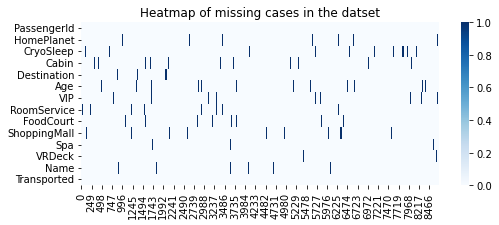

In [407]:
plt.figure(figsize=(8,3)) # Heatmap of missing values
sns.heatmap(sp_ti.isna().T, cmap='Blues')
plt.title('Heatmap of missing cases in the datset')

Based on the heatmap above, it appears that the missing values in the dataset are distributed **randomly** rather than following a specific pattern.

Missing proportion of dataset: 0.2673415391694467


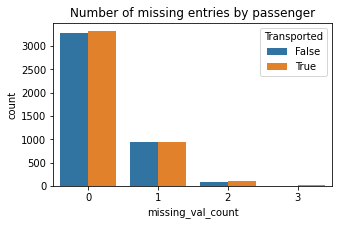

In [408]:
#Countplot of number of missing values by the transportation status of the passengers
print("Missing proportion of dataset:",nan_summary.sum()/sp_ti.shape[0]) #proporion of dataset missing
sp_ti['missing_val_count']=sp_ti.isna().sum(axis=1)
plt.figure(figsize=(5,3))
palette = {'S': 'orange', 'T': 'blue'}
sns.countplot(data=sp_ti, x='missing_val_count', hue='Transported')
plt.title('Number of missing entries by passenger')
sp_ti.drop('missing_val_count', axis=1, inplace=True)


The count of missing values is consistent across both states of the "Transported" feature. There is approximately **27%** of the data that is missing one or more details, resulting in missing cases. Hence, removing records with NaN values will lead to significant data loss. The missing data is handled through imputation methods, as explained in the section below.

### Missing value treatment in the dataframe

According to the data field definitions, each Id takes the form gggg_pp where **gggg** indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [409]:
 #Splitting the passesnger ID to retrieve 'gggg' and retain the first  four numbers
sp_ti['Group'] = sp_ti['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
summ=sp_ti.groupby('Group').count() #Taking the count by the group
summ = summ.sort_values(by='PassengerId', ascending=False)

In [410]:
sp_ti['Group_size'] = sp_ti['Group'].map(sp_ti['Group'].value_counts()) #Display the count of group size
sp_ti.groupby('Group_size').size()

Group_size
1    4805
2    1682
3    1020
4     412
5     265
6     174
7     231
8     104
dtype: int64

An effective method of exploring the relationship between features is to examine their joint distribution. For instance, we can explore whether passengers from the same group are likely to come from the same home planet. While there are numerous feature combinations to consider, a few of them have been explored here.

In [411]:
sp_ti['Cabin_deck'] =sp_ti['Cabin'].str.split('/', expand=True)[0].str[0] #Splitting  the cabin_deck 
#column to extract the cabin , number and side details of the assigned cabin deck.
sp_ti["Num"] = list(map(float, sp_ti["Cabin"].str.split("/").str[1]))
sp_ti["Side"] = sp_ti["Cabin"].str.split("/").str[2]
#sp_ti = sp_ti.drop(["Cabin"], axis=1) #Dropping the cabin column from the dataset

<AxesSubplot: xlabel='Cabin_deck', ylabel='HomePlanet'>

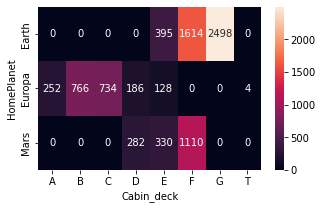

In [412]:
#Group the dataframe by cabin deck and homeplanet to take the count of the joint occurences
cd_hp_cnt = pd.crosstab(sp_ti['HomePlanet'], sp_ti['Cabin_deck'])
plt.figure(figsize=(5,3))
sns.heatmap(cd_hp_cnt, annot=True, fmt='g')# Create a heatmap of the count values

It can be concluded that passengers from Europa were on decks A, B, C, and T, while those from Earth were exclusively on deck G. Passengers from multiple planets were on decks D, E, and F. Assuming that this pattern can be extended to values missing for Homeplanet, the homeplanet values can be populated for the decks A, B, C, and T where passengers from the specific planets are hosted.

In [413]:
HP_before=sp_ti['HomePlanet'].isna().sum()  #

# Filter for NA cases of HomePlanet if they belong to decks A, B, C or T they came from Europa
sp_ti.loc[(sp_ti['HomePlanet'].isna()) & (sp_ti['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

#  Filter for NA cases of HomePlanet if they belong to decks A, B, C or T they came from Earth
sp_ti.loc[(sp_ti['HomePlanet'].isna()) & (sp_ti['Cabin_deck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('Number of HomePlanet missing values before replacement:',HP_before)
print('Number of HomePlanet missing values after:',sp_ti['HomePlanet'].isna().sum())

Number of HomePlanet missing values before replacement: 201
Number of HomePlanet missing values after: 109


(0.0, 3500.0)

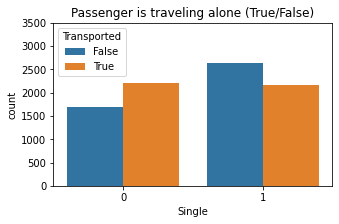

In [414]:
# New feature is added to the dataframe to track passngers if they are traveling alone or in a group
sp_ti['Single']=(sp_ti['Group_size']==1).astype(int)
plt.figure(figsize=(5,3))
sns.countplot(data=sp_ti, x='Single', hue='Transported')
plt.title('Passenger is traveling alone (True/False)')
plt.ylim([0,3500])

In [415]:
temp= pd.crosstab(sp_ti['Group'], sp_ti['HomePlanet'])  
# Countplot of unique values
print(temp.head(3))
num_zeros = (temp == 0).sum(axis=1) #Taking the sum of count of zeros
np.unique(num_zeros) 

HomePlanet  Earth  Europa  Mars
Group                          
1               0       1     0
2               1       0     0
3               0       2     0


array([2], dtype=int64)

Passengers from the same group tend to come from the same planet as confirmed above.

In [416]:
HP_before=sp_ti['HomePlanet'].isna().sum()

# Passengers with missing HomePlanet and in a group where the value of HomePlanet is present for other passengers
HP_index=sp_ti[sp_ti['HomePlanet'].isna()][(sp_ti[sp_ti['HomePlanet'].isna()]['Group']).isin(temp.index)].index
HP_index
# Fill corresponding missing values
sp_ti.loc[HP_index,'HomePlanet']=sp_ti.iloc[HP_index,:]['Group'].map(lambda x: temp.idxmax(axis=1)[x])

In [417]:
# Print number of missing values left
print('Number of HomePlanet missing values before replacement:',HP_before)
print('Number of HomePlanet missing values after replacement:',sp_ti['HomePlanet'].isna().sum())

Number of HomePlanet missing values before replacement: 109
Number of HomePlanet missing values after replacement: 63


In [418]:
# Calculate the proportion of HomePlanet value in the column
prop = sp_ti['HomePlanet'].value_counts(normalize=True)
prop

Earth     0.541715
Europa    0.251217
Mars      0.207068
Name: HomePlanet, dtype: float64

Analyzing the distribution of the continuous variables. The columns capturing expenditure is visibly right skewed with extreme values and the age is almost Normal with a few outlier values.

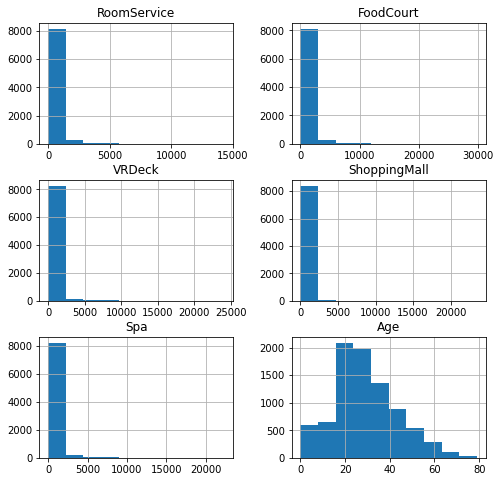

In [419]:
# plot histograms of multiple columns
sp_ti.hist(column=['RoomService', 'FoodCourt', 'VRDeck','ShoppingMall','Spa','Age'], figsize=(8, 8))
plt.show()

Text(0.5, 0, 'Age (years)')

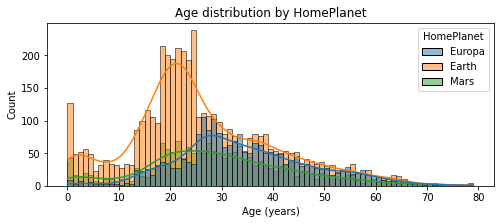

In [420]:
plt.figure(figsize=(8,3))
sns.histplot(data=sp_ti, x='Age', hue='HomePlanet', binwidth=1, kde=True) ## Histogram by homeplanet
plt.title('Age distribution by HomePlanet')
plt.xlabel('Age (years)')

To impute the missing values in the age feature, we can take the mean value of each home planet group and use it as a replacement. The spread of age by planet shows that passengers from Earth are generally younger than those from Europa and Mars.

In [421]:
mean_age_by_planet = sp_ti.groupby('HomePlanet')['Age'].mean() # Calculate mean age by HomePlanet
for planet, mean_age in mean_age_by_planet.items(): # Impute missing ages with mean value by Homeplanet
    sp_ti.loc[(sp_ti['Age'].isna()) & (sp_ti['HomePlanet'] == planet), 'Age'] = mean_age

The impute_func is a simple function that uses the SimpleImputer class to fill in missing values in a specified column of a given dataset. It takes in the column name, dataset, and a strategy to determine how to fill in the missing values. For the expenditure column, it is observed that most passengers don't prefer to spend, so the median value is used for imputation. However, from the plots, it can be inferred that the median values will be close to zero. In the case of the VIP, Destination and Deck features, the most frequently occurring value is used as a strategy for imputing missing values.

In [422]:
#Function definition for value imputing
def impute_func(col, data, strategy='mean'):
    imp = SimpleImputer(strategy= strategy)
    data[col] = imp.fit_transform(data[[col]])
    dict_imp[col] = imp
    return data[col]


In [423]:
sp_ti['RoomService'] = impute_func('RoomService',sp_ti,strategy = 'median')
sp_ti['FoodCourt'] = impute_func('FoodCourt',sp_ti,strategy = 'median')
sp_ti['ShoppingMall'] = impute_func('ShoppingMall',sp_ti,strategy = 'median')
sp_ti['Spa'] = impute_func('Spa',sp_ti,strategy = 'median')
sp_ti['VRDeck'] = impute_func('VRDeck',sp_ti,strategy = 'median')
sp_ti['Cabin_deck'] = impute_func('Cabin_deck',sp_ti,strategy = 'most_frequent')
sp_ti['Side'] = impute_func('Side',sp_ti,strategy = 'most_frequent')
sp_ti['VIP'] = impute_func('VIP',sp_ti,strategy = 'most_frequent')


The total expenditure is added together to form one column total_expenditure and used as a feature in the rest of the analysis.

In [424]:
sp_ti['Total_exp']=sp_ti['RoomService'] + sp_ti['Spa']+sp_ti['VRDeck']+sp_ti['FoodCourt']+sp_ti['ShoppingMall']

In [425]:
sp_ti['spend_flag']= np.where(sp_ti['Total_exp']>0,'Y','N') ## creaye

If the cryogenic value is missing and total exp in zero then the value can be imputed as True because people who are suspended animation will not leave their cabin.

In [426]:
Cr_sl_bef=sp_ti['CryoSleep'].isna().sum()

na_rows=sp_ti.loc[sp_ti['CryoSleep'].isna(),'CryoSleep'].index

sp_ti.loc[sp_ti['CryoSleep'].isna(),'CryoSleep']=sp_ti.groupby(['spend_flag'])['CryoSleep']. \
transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows]

# Print number of missing values left
print('Number of  missing values before replacement:',Cr_sl_bef)
print('Number of  missing values before replacement:',sp_ti['CryoSleep'].isna().sum())

Number of  missing values before replacement: 217
Number of  missing values before replacement: 0


In [427]:
##Displaying the missing value summary after the treatment
nan_summary = sp_ti.isna().sum() # Get the summary of NaN values by column

# Print the summary
print(nan_summary[nan_summary>0])
nan_summary.sum()

HomePlanet      63
Cabin          199
Destination    182
Name           200
Num            199
dtype: int64


843

In [428]:
sp_ti_wona=sp_ti.dropna()
(sp_ti.shape[0]-sp_ti_wona.shape[0])/sp_ti.shape[0]

0.07201196364891292

After missing value treatment 7% of the data is removed.

## Give a ggpairs plot of what you think are the six most important variables. At least one must be categorical, and one continuous. Explain your choice of variables and the trends between them. (Mandatory)

In [429]:
#Creating a list of 
selected_vars = ['Total_exp', 'Age','Transported','HomePlanet','Destination','Cryosleep','Cabin_deck'] 

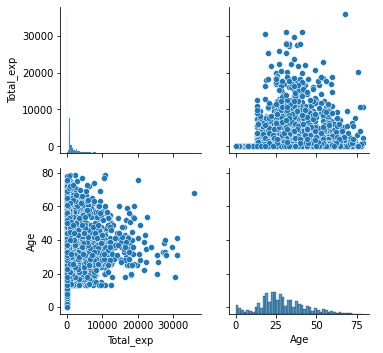

In [449]:
g = sns.PairGrid(sp_ti_wona[['Total_exp', 'Age']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

This pattern suggests that for lower age values, the expenditure is generally low and concentrated around a specific range. However, as age increases, the expenditure values become more spread out and diverse.

In [430]:
sp_ti_wona['Log_tot_exp']=np.log(sp_ti_wona['Total_exp']+1) #Performing log transform of the column

C:\Users\vidya\AppData\Local\Temp\ipykernel_25732\3077067007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_ti_wona['Log_tot_exp']=np.log(sp_ti_wona['Total_exp']+1) #Performing log transform of the column


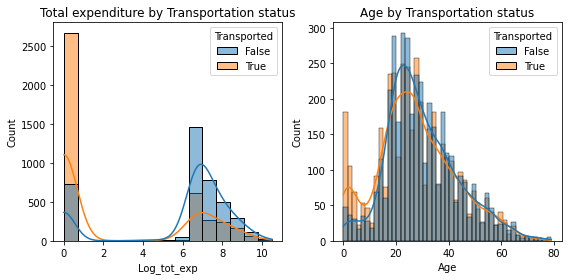

In [431]:

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(data=sp_ti_wona, x='Log_tot_exp', hue='Transported', ax=axes[0],kde=True) ## Plot the histogram for 'Total_exp' on the first subplot
axes[0].set_title("Total expenditure by Transportation status")

sns.histplot(data=sp_ti_wona, x='Age', hue='Transported', ax=axes[1],kde=True) # Plot the histogram for 'Age' on the second subplot
axes[1].set_title("Age by Transportation status")

# Display the plots
plt.tight_layout()
plt.show()

- Most people spend close to zero
- Logarith transformed distribution is plotted as observed it decays slowly
- Successfully transported passengers have spent less
- From the age plot, it can be observed that the younger you are, the more likely you are to be transported successfully

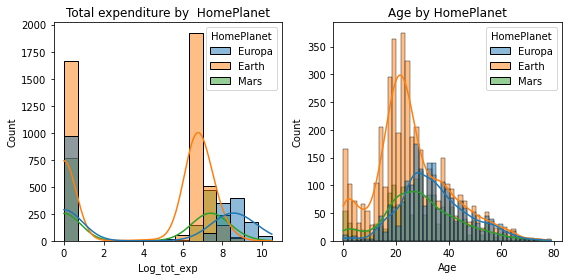

In [432]:

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot the histogram for 'Total_exp' on the first subplot
sns.histplot(data=sp_ti_wona, x='Log_tot_exp', hue='HomePlanet', ax=axes[0],kde=True)
axes[0].set_title("Total expenditure by  HomePlanet")

# Plot the histogram for 'Age' on the second subplot
sns.histplot(data=sp_ti_wona, x='Age', hue='HomePlanet', ax=axes[1],kde=True)
axes[1].set_title("Age by HomePlanet")

# Display the plots
plt.tight_layout()
plt.show()

- The expenditure curve shows that passengers from Europa are either high spenders or low spenders
- The expenditure pattern for passengers from Earth ranges from low to medium
- As noted in the previous section, passengers from Earth tend to be younger than Europa or Mars

Text(0.5, 1.0, 'Total expenditure by  Cabin Deck')

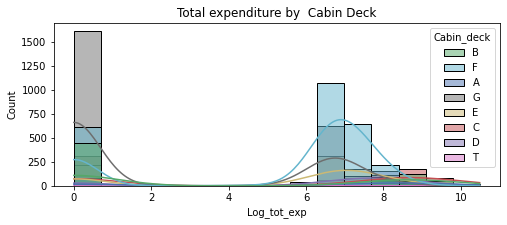

In [445]:

# Create two subplots side by side
fig, axes = plt.subplots(1, 1, figsize=(8, 3))
palette = {'A': '#4c72b0', 'B': '#55a868', 'C': '#c44e52', 'D': '#8172b2', 'E': '#ccb974', 'F': '#64b5cd', 'G': '#6e6e6e','T':'#d773c7'}

# Plot the histogram for 'Total_exp' on the first subplot
sns.histplot(data=sp_ti_wona, x='Log_tot_exp', hue='Cabin_deck', ax=axes,kde=True,palette=palette)
axes.set_title("Total expenditure by  Cabin Deck")


<Figure size 216x216 with 0 Axes>

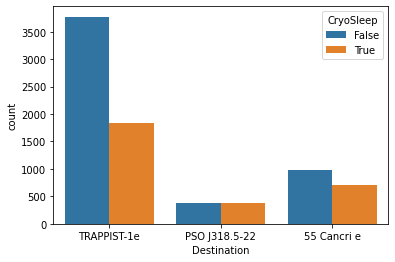

<Figure size 216x216 with 0 Axes>

In [446]:
#sns.countplot(data=sp_ti_wona, x='CryoSleep', hue='HomePlanet')
sns.countplot(data=sp_ti_wona, x='Destination', hue='CryoSleep')
plt.figure(figsize=(3,3))


- It can be observed that the proportion of people who elected to be put into suspended animation for the duration of the voyage is 50%-50% in the case of the "PSO" destination.
- In the case of the TRAPPIST destination, the majority of passengers did not elect to undergo cryosleeping.

## Build a classification tree of one of the six variables from the last part as a function of the other five, and any other explanatory variables you think are necessary. Show code, explain reasoning, and show the tree as a simple (ugly) plot. Show the confusion matrix. Give two example predictions and follow them down the tree.

The model will use 'Transport' as the target variable and 'Total_exp', 'Age', 'HomePlanet', 'Destination', 'CryoSleep', and 'Cabin_deck' as explanatory variables.The categorical variables are converted into one-hot encoded features to be used as input for the classifier model.

In [436]:
sp_ti_wona.groupby('Transported').size() 

Transported
False    4004
True     4063
dtype: int64

The classes of binary indicator Transportation is balanced. 

In [437]:
# Define the target variable and the explanatory variables
target = 'Transported'
explanatory_vars =['Total_exp', 'Age','HomePlanet','Destination','CryoSleep','Cabin_deck']


cols_to_dummy = ['Destination', 'HomePlanet','CryoSleep','Cabin_deck'] #Variables passed for being converted to dummy variables
X_dummies = pd.get_dummies(sp_ti_wona[cols_to_dummy], columns=cols_to_dummy)

X_dummies=X_dummies.reset_index(drop=True)

X_dummies = pd.get_dummies(sp_ti_wona[cols_to_dummy], columns=cols_to_dummy)
continuous_vars=sp_ti_wona.loc[:,['Total_exp', 'Age']]

# Concat the dummy columnn with the continuous variables
X=pd.concat([continuous_vars,X_dummies],axis=1)
X.head(3)


,Total_exp,Age,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T
0,0.0,39.0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,736.0,24.0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
2,10383.0,58.0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0


In [438]:
#Removing the special characters from the column names
current_cols=X.columns
new_cols = [col.replace("-", "").replace(":", "").replace(" ", "_").replace(".", "_") for col in current_cols]

# Assign the new column names to the dataframe
X.columns = new_cols

In [439]:
#Split the dataset into train and test based on the explanatory and target variables
# Train- 80% , Test -20%
X_train, X_test, y_train, y_test = train_test_split(X, sp_ti_wona[target], test_size=0.2, random_state=42)

# Build the classification tree
clf = DecisionTreeClassifier(max_depth=4,min_samples_split=20)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_split=20)

Decision tree classifier is instantiated with a maximum depth of 4 and a minimum number of samples required to split an internal node of 20.Setting the maximum depth of a decision tree helps to prevent overfitting by limiting the depth of the tree. When the tree is too deep, it cannot generalize well to new data.Setting the min_samples_split parameter helps to avoid overfitting by specifying the minimum number of samples required to split an internal node. 

### Displaying  the confusion matrix

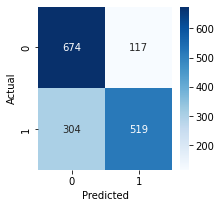

Accuracy:  0.7391573729863693


In [440]:

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)


### Plotting the decision tree

In [441]:
from sklearn.tree import export_text
# display the decision tree in text format
tree_rules = export_text(clf, feature_names=list(X_train.columns))
print(tree_rules)

|--- Total_exp <= 0.50
|   |--- HomePlanet_Earth <= 0.50
|   |   |--- Cabin_deck_E <= 0.50
|   |   |   |--- CryoSleep_True <= 0.50
|   |   |   |   |--- class: True
|   |   |   |--- CryoSleep_True >  0.50
|   |   |   |   |--- class: True
|   |   |--- Cabin_deck_E >  0.50
|   |   |   |--- HomePlanet_Europa <= 0.50
|   |   |   |   |--- class: False
|   |   |   |--- HomePlanet_Europa >  0.50
|   |   |   |   |--- class: True
|   |--- HomePlanet_Earth >  0.50
|   |   |--- Destination_TRAPPIST1e <= 0.50
|   |   |   |--- Age <= 42.50
|   |   |   |   |--- class: True
|   |   |   |--- Age >  42.50
|   |   |   |   |--- class: False
|   |   |--- Destination_TRAPPIST1e >  0.50
|   |   |   |--- CryoSleep_True <= 0.50
|   |   |   |   |--- class: False
|   |   |   |--- CryoSleep_True >  0.50
|   |   |   |   |--- class: True
|--- Total_exp >  0.50
|   |--- Cabin_deck_C <= 0.50
|   |   |--- HomePlanet_Mars <= 0.50
|   |   |   |--- Cabin_deck_B <= 0.50
|   |   |   |   |--- class: False
|   |   |   |--- C

Filtering the dataframe for the cases where the predictions matched then trace that down the tree based on the row values 

In [ ]:
match_indices = np.where(np.array(y_test) == y_pred)[0]
#match_cases = X_test[match_indices]
match_indices

### Tracing down the decision tree for two samples from test set

#### Passenger e.g. 1:

In [442]:
#! sample from the test data tracing it down the tree
X_test.loc[2309,:]

Total_exp                   1997.0
Age                           17.0
Destination_55_Cancri_e        0.0
Destination_PSO_J318_522       0.0
Destination_TRAPPIST1e         1.0
HomePlanet_Earth               1.0
HomePlanet_Europa              0.0
HomePlanet_Mars                0.0
CryoSleep_False                1.0
CryoSleep_True                 0.0
Cabin_deck_A                   0.0
Cabin_deck_B                   0.0
Cabin_deck_C                   0.0
Cabin_deck_D                   0.0
Cabin_deck_E                   0.0
Cabin_deck_F                   1.0
Cabin_deck_G                   0.0
Cabin_deck_T                   0.0
Name: 2309, dtype: float64

- The passenger's expenditure value is 1997, which leads them to the branch where the total expenditure is higher than 0.5.
- In the second level, it is checked whether the passenger is traveling in deck "C," which is false.
- Then it is checked if the passenger's home planet is Mars, which is also false.
- Further down, after checking whether the passenger is traveling in deck C, it is recorded that the passenger transportation was not successful

#### Passenger e.g. 2:

In [447]:
X_test.loc[804,:]

Total_exp                    0.0
Age                         32.0
Destination_55_Cancri_e      1.0
Destination_PSO_J318_522     0.0
Destination_TRAPPIST1e       0.0
HomePlanet_Earth             0.0
HomePlanet_Europa            1.0
HomePlanet_Mars              0.0
CryoSleep_False              0.0
CryoSleep_True               1.0
Cabin_deck_A                 0.0
Cabin_deck_B                 1.0
Cabin_deck_C                 0.0
Cabin_deck_D                 0.0
Cabin_deck_E                 0.0
Cabin_deck_F                 0.0
Cabin_deck_G                 0.0
Cabin_deck_T                 0.0
Name: 804, dtype: float64

- The passenger's expenditure value is 0, which leads them to the branch where the total expenditure is lesser than 0.5.
- In the second level, it is checked whether passenger's home planet is Earth, which is false.
- Then it is checked whether the passenger is traveling in deck "E" which is false.
- Further down, after checking whether the passenger has elected for cryosleep, it is recorded that the passenger transportation was  successful

In [205]:
np.sort(y_test.index)

array([    2,    12,    14, ..., 20690, 20698, 20708], dtype=int64)

In [214]:
fig.savefig("decistion_tree_f.png")



# Build another model using one of the continuous variables from your six most important. This time use your model selection and dimension reduction tools, and include at least one non-linear term. (Mandatory)


The objective here is to predict the age of the passenger based on 'Destination','Cabin_deck','VIP','HomePlanet',Total expenditure variables.

In [450]:
sp_ti_age_pred=sp_ti_wona #[sp_ti_wona["CryoSleep"]==False]
sp_ti_age_pred=sp_ti_age_pred.reset_index(drop=True)

The data is right skewed.Log transform is used to linearize a relationship between variables, reduce skewness, and normalize the distribution of the data. On the other hand, StandardScaler is used to standardize the scale of the data, which is important in many machine learning algorithms to prevent features with larger scales from dominating the model.These two steps are applied to the total expenditure feature

In [584]:
sp_ti_age_pred.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Group', 'Group_size', 'Cabin_deck', 'Num',
       'Side', 'Single', 'Total_exp', 'spend_flag', 'Log_tot_exp'],
      dtype='object')

In [585]:
target = 'Age' #Select the target variable
explanatory_vars =['Log_tot_exp','Destination','Cabin_deck','HomePlanet','CryoSleep'] #Select the explanatory variables

cols_to_dummy = ['Destination','HomePlanet','Side','CryoSleep','Cabin_deck']   
#Create one hot encoding of the filtered columns
X_dummies = pd.get_dummies(sp_ti_age_pred[cols_to_dummy], columns=cols_to_dummy)
continuous_vars=sp_ti_wona.loc[:,['Total_exp']]
continuous_vars=continuous_vars.reset_index(drop=True)
scaler =  MinMaxScaler()
 
X=pd.concat([continuous_vars,X_dummies],axis=1)
X.columns = ['Log_tot_exp'] + list(X.columns[1:]) 



In [586]:
current_cols=X.columns
#Treating the special characters of the  
new_cols = [col.replace("-", "").replace(":", "").replace(" ", "_").replace(".", "_") for col in current_cols]

# Assign the new column names to the dataframe
X.columns = new_cols

In [587]:
X=pd.DataFrame(scaler.fit_transform(X))

#X['Total_exp']=X['Total_exp']**1/3
X.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.020452,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.288521,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [588]:
y=(sp_ti_age_pred[target].values)
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split((X), y, range(len(y)), test_size=0.15, random_state=42, shuffle=True)

In [613]:
#import statsmodels 
#exog = statsmodels.tools.tools.add_constant(X_train)
#endog=statsmodels.tools.tools.add_constant(y_train)

exog, endog = (X_train), y_train 


In [614]:
#GLM being used here is a Tweedie model with a variance power of 1.5.
#Tweedie distribution is a flexible family of distributions that can model dispersed dataset
gamma_model = sm.GLM(endog, exog, family=sm.families.Tweedie(var_power=1.5))
gamma_results = gamma_model.fit()


In [615]:
#Printing the model summary
print(gamma_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6856
Model:                            GLM   Df Residuals:                     6841
Model Family:                 Tweedie   Df Model:                           14
Link Function:                    Log   Scale:                          1.3302
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Apr 2023   Deviance:                       11680.
Time:                        23:44:42   Pearson chi2:                 9.10e+03
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.4551      0.090      5.034      0.0

In [616]:

p_values = gamma_results.pvalues # Get the p-values from the gamma_results object

feature_names = X_train.columns # Get the feature names from the exog DataFrame
significant_indices = np.where(p_values < 0.05)[0] # Find the indices of the significant features (p < 0.05)
significant_features = feature_names[significant_indices] # Get the names of the significant features

print("Significant features:", significant_features) # Print the names of the significant features



Significant features: Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')


In [617]:
significant_features
significant_features_1 = [new_cols[i] for i in significant_features]
print(significant_features_1)

['Log_tot_exp', 'Destination_55_Cancri_e', 'Destination_PSO_J318_522', 'Destination_TRAPPIST1e', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Side_P', 'Side_S', 'CryoSleep_False', 'CryoSleep_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F']


### Model assessment

In [618]:
# Predict on test set
y_pred = gamma_results.predict(X_test)

# Cap y_test at 1
y_test_exp =( y_test)
y_test_exp[y_test == 0] = 1

# Generate predictions on test set
y_pred =(gamma_results.predict(X_test))

# Compute mean squared error
mse = np.mean((y_pred - y_test_exp)**2)
print("Mean squared error:", mse)

r2_score(y_test_exp, y_pred)


Mean squared error: 172.79504191979424


0.08301402869315067

In [619]:

# Compute MAPE
mape = 100 * np.mean(np.abs((y_test_exp - y_pred) / y_test_exp))
print("Mean Absolute Percentage Error:", mape)


Mean Absolute Percentage Error: 129.53959049413507


<AxesSubplot: >

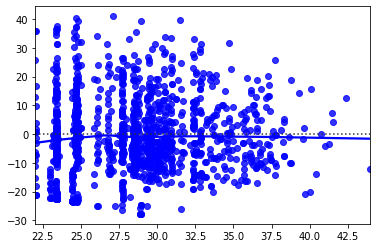

In [620]:
# Compute residuals
residuals = y_test_exp - y_pred

# Plot residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, color="b")

### Model selection


In [621]:
# Start backward elimination
while True:
    # Get the p-values of the current model
    p_values = gamma_results.pvalues[1:]
    # Find the feature with the highest p-value
    feature_to_remove = p_values.idxmax()
    # If the highest p-value is above the significance level (e.g., 0.05), remove the feature
    if p_values.max() > 0.05:
        print(f"Removing feature '{feature_to_remove}' with p-value {p_values[feature_to_remove]}")
        exog = exog.drop(columns=[feature_to_remove])
        gamma_model = sm.GLM(endog, exog, family=sm.families.Tweedie(var_power=1.5))
        gamma_results = gamma_model.fit()
    # If the highest p-value is below the significance level, stop the elimination process
    else:
        break

# Print the summary of the final model
print(gamma_results.summary())

Removing feature '17' with p-value 0.2142442506263077
Removing feature '18' with p-value 0.2464772019930901
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6856
Model:                            GLM   Df Residuals:                     6842
Model Family:                 Tweedie   Df Model:                           13
Link Function:                    Log   Scale:                          1.3257
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 23 Apr 2023   Deviance:                       11682.
Time:                        23:44:51   Pearson chi2:                 9.10e+03
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

In [622]:
significant_features = exog.columns.tolist()
print("Significant features:", significant_features)
significant_features
significant_features_1 = [new_cols[i] for i in significant_features]
print(significant_features_1)

Significant features: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
['Log_tot_exp', 'Destination_55_Cancri_e', 'Destination_PSO_J318_522', 'Destination_TRAPPIST1e', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Side_P', 'Side_S', 'CryoSleep_False', 'CryoSleep_True', 'Cabin_deck_A', 'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F']


In [626]:
# Predict on test set
y_pred = gamma_results.predict(X_test[significant_features])

# Cap y_test at 1
y_test_exp =( y_test)
y_test_exp[y_test == 0] = 1

# Generate predictions on test set
y_pred =(gamma_results.predict(X_test[significant_features]))

# Compute mean squared error
mse = np.mean((y_pred - y_test_exp)**2)
print("Mean squared error:", mse)

r2_score(y_test_exp, y_pred)


Mean squared error: 172.7938525802787


0.08302034026111438

In [625]:

# Compute MAPE
mape = 100 * np.mean(np.abs((y_test_exp - y_pred) / y_test_exp))
print("Mean Absolute Percentage Error:", mape)


Mean Absolute Percentage Error: 129.61511160657662


No significant improvement in the model performance has been observed after refitting the model on the best features.